## Logistic Regression - Titanic

The titanic dataset is a popular dummy dataset used to learn about logistic regression. It has also been used in a [Kaggle data science competition](https://www.kaggle.com/c/titanic), so you'll also find blogposts exploring all kinds of more advanced concepts that use this dataset too! In this assignment, you'll do a logistic regression to look at the effect of sex and class on survival on the titanic, by computing odds ratios.

adapted from: https://github.com/jstray/lede-algorithms/blob/master/week-3/week-3-2-homework.ipynb

Some references:

- [What are odds vs. probability?](https://towcenter.gitbooks.io/curious-journalist-s-guide-to-data/content/analysis/counting_possible_worlds.html)
- [Investigate.ai on Logistic Regressions](https://investigate.ai/regression/logistic-regression-quickstart/)
- [StatQuest Logistic Regressions Playlist](https://www.youtube.com/watch?v=yIYKR4sgzI8&list=PLblh5JKOoLUKxzEP5HA2d-Li7IJkHfXSe)
- [How do I interpret odds ratios in logistic regression?](https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-how-do-i-interpret-odds-ratios-in-logistic-regression/) This one's a little more technical, but has good examples.


In [1]:
import pandas as pd
import numpy as np 
from plotnine import *

### Load the data

Read in the `titanic.csv` data set again.

In [2]:
# Load titanic.csv
df = pd.read_csv('titanic.csv')
df.columns = df.columns.str.replace(" ", "_")
df.columns = df.columns.str.replace("-", "_")
df.columns = df.columns.str.lower()
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df

,pclass,survived,name,age,embarked,home.dest,room,ticket,boat,gender
0,1st,1,"Allen, Miss Elisabeth Walton",29.0000,Southampton,"St Louis, MO",B-5,24160 L221,2,female
1,1st,0,"Allison, Miss Helen Loraine",2.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female
2,1st,0,"Allison, Mr Hudson Joshua Creighton",30.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,-135,male
3,1st,0,"Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)",25.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female
4,1st,1,"Allison, Master Hudson Trevor",0.9167,Southampton,"Montreal, PQ / Chesterville, ON",C22,NaN,11,male
5,1st,1,"Anderson, Mr Harry",47.0000,Southampton,"New York, NY",E-12,NaN,3,male
6,1st,1,"Andrews, Miss Kornelia Theodosia",63.0000,Southampton,"Hudson, NY",D-7,13502 L77,10,female
7,1st,0,"Andrews, Mr Thomas, jr",39.0000,Southampton,"Belfast, NI",A-36,NaN,NaN,male
8,1st,1,"Appleton, Mrs Edward Dale (Charlotte Lamson)",58.0000,Southampton,"Bayside, Queens, NY",C-101,NaN,2,female
9,1st,0,"Artagaveytia, Mr Ramon",71.0000,Cherbourg,"Montevideo, Uruguay",NaN,NaN,-22,male


In [3]:
!Open titanic.csv

The first thing we need to do is code the pclass and gender variables numerically. Let's use the following scheme:
- pclass: 1,2,3
- gender: 0=male, 1=female, and let's call the column called "female" to remind us which is which

In [3]:
# recode the pclass and gender variables so they are numeric
df['pclass'] = df.pclass.replace({'1st': 1, '2nd': 2, '3rd': 3})
df['female'] = df.gender.replace({'male': 0, 'female': 1})
df.head(3)

,pclass,survived,name,age,embarked,home.dest,room,ticket,boat,gender,female
0,1,1,"Allen, Miss Elisabeth Walton",29.0,Southampton,"St Louis, MO",B-5,24160 L221,2,female,1
1,1,0,"Allison, Miss Helen Loraine",2.0,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female,1
2,1,0,"Allison, Mr Hudson Joshua Creighton",30.0,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,-135,male,0


### 1. Exploratory data analysis

In [4]:
df.head()

,pclass,survived,name,age,embarked,home.dest,room,ticket,boat,gender,female
0,1,1,"Allen, Miss Elisabeth Walton",29.0000,Southampton,"St Louis, MO",B-5,24160 L221,2,female,1
1,1,0,"Allison, Miss Helen Loraine",2.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female,1
2,1,0,"Allison, Mr Hudson Joshua Creighton",30.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,-135,male,0
3,1,0,"Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)",25.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female,1
4,1,1,"Allison, Master Hudson Trevor",0.9167,Southampton,"Montreal, PQ / Chesterville, ON",C22,NaN,11,male,0


In [5]:
# First, let's do some descriptive stats
# 
# How many men and women are travelling on the titanic?
# How many people are travelling in each class?
# What share of each survived?
piv = df.pivot_table(index='survived', columns='female', aggfunc='count', values='name')
display(piv)

pct_survived = piv.apply(lambda x: x/sum(x)).round(2)
display(pct_survived)

female,0,1
survived,,
0,708,156
1,142,307


female,0,1
survived,,
0,0.83,0.34
1,0.17,0.66


### 2. Logistic regression with one variable at a time

First, do a logistic regression of the `female` variable alone to predict the probability of survival. Below is some code that will help you plot the result.

In [6]:
# Step 1: Run a logistic regression on one variable and see the summary of the output

# hint: 
# https://investigate.ai/regression/logistic-regression-quickstart/#Performing-a-regression
import statsmodels.formula.api as smf

model = smf.logit("survived ~ female", data=df)
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.517411
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               survived   No. Observations:                 1313
Model:                          Logit   Df Residuals:                     1311
Method:                           MLE   Df Model:                            1
Date:                Fri, 08 Apr 2022   Pseudo R-squ.:                  0.1945
Time:                        14:58:21   Log-Likelihood:                -679.36
converged:                       True   LL-Null:                       -843.38
Covariance Type:            nonrobust   LLR p-value:                 2.572e-73
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.6066      0.092    -17.473      0.000      -1.787      -1.426
female         2.2836      0.135     16.963      0.000       2.020       2.547
==============================================================================
"""

In [13]:
# Step 2: analyze the dataframe with predicted values

# hint: 
# you'll need to create a new column on df and use results.predict() to assign it values
# https://investigate.ai/regression/logistic-regression-quickstart/#Making-predictions
df['prediction'] = results.predict()
df

,pclass,survived,name,age,embarked,home.dest,room,ticket,boat,gender,female,prediction
0,1,1,"Allen, Miss Elisabeth Walton",29.0000,Southampton,"St Louis, MO",B-5,24160 L221,2,female,1,0.663067
1,1,0,"Allison, Miss Helen Loraine",2.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female,1,0.663067
2,1,0,"Allison, Mr Hudson Joshua Creighton",30.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,-135,male,0,0.167059
3,1,0,"Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)",25.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female,1,0.663067
4,1,1,"Allison, Master Hudson Trevor",0.9167,Southampton,"Montreal, PQ / Chesterville, ON",C22,NaN,11,male,0,0.167059
5,1,1,"Anderson, Mr Harry",47.0000,Southampton,"New York, NY",E-12,NaN,3,male,0,0.167059
6,1,1,"Andrews, Miss Kornelia Theodosia",63.0000,Southampton,"Hudson, NY",D-7,13502 L77,10,female,1,0.663067
7,1,0,"Andrews, Mr Thomas, jr",39.0000,Southampton,"Belfast, NI",A-36,NaN,NaN,male,0,0.167059
8,1,1,"Appleton, Mrs Edward Dale (Charlotte Lamson)",58.0000,Southampton,"Bayside, Queens, NY",C-101,NaN,2,female,1,0.663067
9,1,0,"Artagaveytia, Mr Ramon",71.0000,Cherbourg,"Montevideo, Uruguay",NaN,NaN,-22,male,0,0.167059


In [15]:
df.prediction.unique()

array([0.66306695, 0.16705882])

In [7]:
# Step 3: What is the odds ratio of on the gender variable alone?

# hint: in order to make sense of the coefficients, you'll need to exponentiate them
# that turns the coefficients into odds ratios
# https://investigate.ai/regression/logistic-regression-quickstart/#Converting-coefficient-to-odds
coefs = pd.DataFrame({
    'coef': results.params.values,
    'odds ratio': np.exp(results.params.values),
    'pvalue': results.pvalues,
    'name': results.params.index
})
coefs

,coef,odds ratio,pvalue,name
Intercept,-1.606617,0.200565,2.306853e-68,Intercept
female,2.283609,9.812026,1.529597e-64,female


Now, try the same thing but with the `pclass` variable

In [8]:
# Step 1: Run a logistic regression on one variable and see the summary of the output

# hint: 
# https://investigate.ai/regression/logistic-regression-quickstart/#Performing-a-regression
model = smf.logit("survived ~ pclass", data=df)
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.576759
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               survived   No. Observations:                 1313
Model:                          Logit   Df Residuals:                     1311
Method:                           MLE   Df Model:                            1
Date:                Fri, 08 Apr 2022   Pseudo R-squ.:                  0.1021
Time:                        14:59:50   Log-Likelihood:                -757.28
converged:                       True   LL-Null:                       -843.38
Covariance Type:            nonrobust   LLR p-value:                 2.459e-39
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3996      0.170      8.236      0.000       1.067       1.733
pclass        -0.9285      0.074    -12.611      0.000      -1.073      -0.784
==============================================================================
"""

In [10]:
# Step 2: analyze the dataframe with predicted values

# hint: 
# you'll need to create a new column on df and use results.predict() to assign it values
# https://investigate.ai/regression/logistic-regression-quickstart/#Making-predictions
df['prediction'] = results.predict()
df

,pclass,survived,name,age,embarked,home.dest,room,ticket,boat,gender,female,prediction
0,1,1,"Allen, Miss Elisabeth Walton",29.0000,Southampton,"St Louis, MO",B-5,24160 L221,2,female,1,0.615642
1,1,0,"Allison, Miss Helen Loraine",2.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female,1,0.615642
2,1,0,"Allison, Mr Hudson Joshua Creighton",30.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,-135,male,0,0.615642
3,1,0,"Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)",25.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female,1,0.615642
4,1,1,"Allison, Master Hudson Trevor",0.9167,Southampton,"Montreal, PQ / Chesterville, ON",C22,NaN,11,male,0,0.615642
5,1,1,"Anderson, Mr Harry",47.0000,Southampton,"New York, NY",E-12,NaN,3,male,0,0.615642
6,1,1,"Andrews, Miss Kornelia Theodosia",63.0000,Southampton,"Hudson, NY",D-7,13502 L77,10,female,1,0.615642
7,1,0,"Andrews, Mr Thomas, jr",39.0000,Southampton,"Belfast, NI",A-36,NaN,NaN,male,0,0.615642
8,1,1,"Appleton, Mrs Edward Dale (Charlotte Lamson)",58.0000,Southampton,"Bayside, Queens, NY",C-101,NaN,2,female,1,0.615642
9,1,0,"Artagaveytia, Mr Ramon",71.0000,Cherbourg,"Montevideo, Uruguay",NaN,NaN,-22,male,0,0.615642


In [11]:
# Step 3: What is the odds ratio of on the pclass variable alone?

# hint: in order to make sense of the coefficients, you'll need to exponentiate them
# that turns the coefficients into odds ratios
# https://investigate.ai/regression/logistic-regression-quickstart/#Converting-coefficient-to-odds
coefs = pd.DataFrame({
    'coef': results.params.values,
    'odds ratio': np.exp(results.params.values),
    'pvalue': results.pvalues,
    'name': results.params.index
})
coefs

,coef,odds ratio,pvalue,name
Intercept,1.399625,4.053680,1.778696e-16,Intercept
pclass,-0.928532,0.395133,1.832570e-36,pclass


**Bonus** 🤖 - Writing clean/DRY code

DRY stands for "Don't Repeat Yourself". This is a good principle of writing clean code. Instead of copy/pasting code multiple times (which can lead to errors if you fix one copy but not the other), you can write DRY code by wrapping any chunk of code you plan to repeat in a function. As a bonus on this section, re-write the code above as a function and run that function once on `female` and once on `pclass`.

### 3. Looking at two variables at a time

We know from the earlier assignment that class also affects survival, so let's add that to our model. Compute a logistic regression on the variables `pclass` and `female`.

In [ ]:
# Logistic regression on two variables

# hint: 
# https://investigate.ai/regression/logistic-regression-quickstart/#Performing-a-regression

In [ ]:
# Step 2: analyze the dataframe with predicted values

# hint: 
# you'll need to create a new column on df and use results.predict() to assign it values
# https://investigate.ai/regression/logistic-regression-quickstart/#Making-predictions

In [ ]:
# Step 3: What is the odds ratio of on the gender variable?

# hint: in order to make sense of the coefficients, you'll need to exponentiate them
# that turns the coefficients into odds ratios
# https://investigate.ai/regression/logistic-regression-quickstart/#Converting-coefficient-to-odds

### 4. What does this mean

What is the odds ratio on the `pclass` variable? What happens to the odds of survival when we move from 1st to 2nd or from 2nd to 3rd class?


In [ ]:
👉

### 5. Bonus - Age

Does the age of a passenger impact their chances of survival?

In [14]:
model = smf.logit("survived ~ age", data=df)
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.683624
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               survived   No. Observations:                  633
Model:                          Logit   Df Residuals:                      631
Method:                           MLE   Df Model:                            1
Date:                Fri, 08 Apr 2022   Pseudo R-squ.:                0.004687
Time:                        15:04:14   Log-Likelihood:                -432.73
converged:                       True   LL-Null:                       -434.77
Covariance Type:            nonrobust   LLR p-value:                   0.04351
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1172      0.188      0.624      0.532      -0.251       0.485
age           -0.0110      0.005     -2.008      0.045      -0.022      -0.000
==============================================================================
"""

In [19]:
df_filter = df[df.age.notna()]

In [20]:
model = smf.logit("survived ~ age", data=df_filter)
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.683624
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               survived   No. Observations:                  633
Model:                          Logit   Df Residuals:                      631
Method:                           MLE   Df Model:                            1
Date:                Fri, 08 Apr 2022   Pseudo R-squ.:                0.004687
Time:                        15:06:05   Log-Likelihood:                -432.73
converged:                       True   LL-Null:                       -434.77
Covariance Type:            nonrobust   LLR p-value:                   0.04351
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1172      0.188      0.624      0.532      -0.251       0.485
age           -0.0110      0.005     -2.008      0.045      -0.022      -0.000
==============================================================================
"""

<AxesSubplot:>

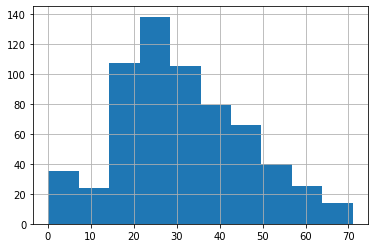

In [22]:
df.age.hist()

In [28]:
from plotnine import *

<AxesSubplot:>

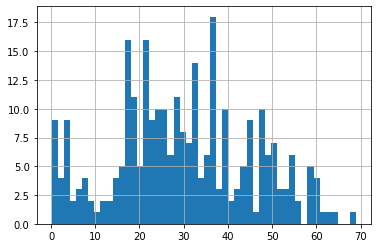

In [37]:
survived = df[df.survived == 1]
survived.age.hist(bins=50)

<AxesSubplot:>

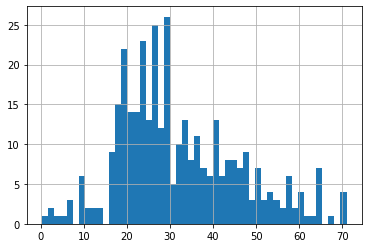

In [38]:
dead = df[df.survived == 0]
dead.age.hist(bins=50)

/Users/angeline_jcq/.pyenv/versions/3.9.7/lib/python3.9/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 680 rows containing missing values.


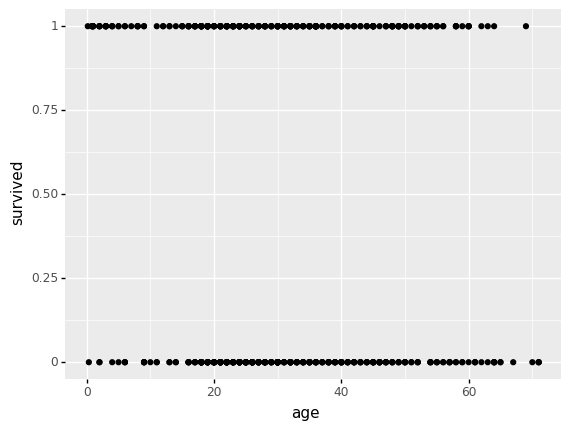

<ggplot: (314274621)>

In [33]:
(
    ggplot(df.query('age.notna()'),         # data
        aes('age', 'survived')) # aesthetics
        + geom_point()      # geometry
)

In [25]:
bins = [0, 10, 25, 40, 120]
labels = ['children','young adult','old adult','very old']
df['agerange'] = pd.cut(df.age, bins, labels = labels, include_lowest = True)

df

,pclass,survived,name,age,embarked,home.dest,room,ticket,boat,gender,female,prediction,agerange
0,1,1,"Allen, Miss Elisabeth Walton",29.0000,Southampton,"St Louis, MO",B-5,24160 L221,2,female,1,0.615642,old adult
1,1,0,"Allison, Miss Helen Loraine",2.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female,1,0.615642,children
2,1,0,"Allison, Mr Hudson Joshua Creighton",30.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,-135,male,0,0.615642,old adult
3,1,0,"Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)",25.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female,1,0.615642,young adult
4,1,1,"Allison, Master Hudson Trevor",0.9167,Southampton,"Montreal, PQ / Chesterville, ON",C22,NaN,11,male,0,0.615642,children
5,1,1,"Anderson, Mr Harry",47.0000,Southampton,"New York, NY",E-12,NaN,3,male,0,0.615642,very old
6,1,1,"Andrews, Miss Kornelia Theodosia",63.0000,Southampton,"Hudson, NY",D-7,13502 L77,10,female,1,0.615642,very old
7,1,0,"Andrews, Mr Thomas, jr",39.0000,Southampton,"Belfast, NI",A-36,NaN,NaN,male,0,0.615642,old adult
8,1,1,"Appleton, Mrs Edward Dale (Charlotte Lamson)",58.0000,Southampton,"Bayside, Queens, NY",C-101,NaN,2,female,1,0.615642,very old
9,1,0,"Artagaveytia, Mr Ramon",71.0000,Cherbourg,"Montevideo, Uruguay",NaN,NaN,-22,male,0,0.615642,very old


In [27]:
model = smf.logit("survived ~ agerange", data=df)
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.675786
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               survived   No. Observations:                  633
Model:                          Logit   Df Residuals:                      629
Method:                           MLE   Df Model:                            3
Date:                Fri, 08 Apr 2022   Pseudo R-squ.:                 0.01610
Time:                        15:13:26   Log-Likelihood:                -427.77
converged:                       True   LL-Null:                       -434.77
Covariance Type:            nonrobust   LLR p-value:                  0.002906
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   0.8575      0.319      2.688      0.007       0.232       1.483
agerange[T.young adult]    -1.1567      0.349     -3.312      0.001      -1.841      -0.472
agerange[T.old adult]      -1.2109      0.347     -3.492      0.000      -1.890      -0.531
agerange[T.very old]       -1.1198      0.356     -3.142      0.002      -1.818      -0.421
===========================================================================================
"""

In [40]:
pd.crosstab(df.female,df.survived, normalize='index').round(2)

survived,0,1
female,,
0,0.83,0.17
1,0.34,0.66


In [41]:
pd.crosstab(df.agerange,df.survived, normalize='index').round(2)

survived,0,1
agerange,,
children,0.30,0.70
young adult,0.57,0.43
old adult,0.59,0.41
very old,0.57,0.43


In [45]:
children = df[df.agerange == 'children']

In [46]:
pd.crosstab(children.pclass,children.survived, normalize='index').round(2)

survived,0,1
pclass,,
1,0.25,0.75
2,0.00,1.00
3,0.57,0.43


In [47]:
children

,pclass,survived,name,age,embarked,home.dest,room,ticket,boat,gender,female,prediction,agerange
1,1,0,"Allison, Miss Helen Loraine",2.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female,1,0.615642,children
4,1,1,"Allison, Master Hudson Trevor",0.9167,Southampton,"Montreal, PQ / Chesterville, ON",C22,NaN,11,male,0,0.615642,children
86,1,1,"Dodge, Master Washington",4.0000,Southampton,"San Francisco, CA",NaN,NaN,7-May,male,0,0.615642,children
242,1,1,"Spedden, Master Robert Douglas",6.0000,Cherbourg,"Tuxedo Park, NY",NaN,NaN,3,male,0,0.615642,children
338,2,1,"Becker, Miss Marion Louise",4.0000,Southampton,"Guntur, India / Benton Harbour, MI",NaN,230136 L39,11,female,1,0.387594,children
339,2,1,"Becker, Master Richard F.",1.0000,Southampton,"Guntur, India / Benton Harbour, MI",NaN,230136 L39,11,male,0,0.387594,children
358,2,1,"Caldwell, Master Alden Gates",0.8333,Southampton,"Bangkok, Thailand / Roseville, IL",NaN,NaN,13,male,0,0.387594,children
376,2,1,"Collyer, Miss Marjorie",8.0000,Southampton,"Bishopstoke, Hants / Fayette Valley, ID",NaN,NaN,14,female,1,0.387594,children
384,2,1,"Davis, Master John Morgan",8.0000,Southampton,"St Ives, Cornwall / Hancock, MI",NaN,NaN,NaN,male,0,0.387594,children
397,2,1,"Drew, Master Marshall Brines",8.0000,Southampton,"Greenport, NY",NaN,28220 L32 10s,NaN,male,0,0.387594,children


In [42]:
model = smf.logit("survived ~ agerange + pclass + female", data=df)
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.423344
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               survived   No. Observations:                  633
Model:                          Logit   Df Residuals:                      627
Method:                           MLE   Df Model:                            5
Date:                Fri, 08 Apr 2022   Pseudo R-squ.:                  0.3836
Time:                        15:40:20   Log-Likelihood:                -267.98
converged:                       True   LL-Null:                       -434.77
Covariance Type:            nonrobust   LLR p-value:                 5.960e-70
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   3.2885      0.562      5.852      0.000       2.187       4.390
agerange[T.young adult]    -2.0097      0.447     -4.494      0.000      -2.886      -1.133
agerange[T.old adult]      -2.2831      0.450     -5.068      0.000      -3.166      -1.400
agerange[T.very old]       -2.9047      0.491     -5.916      0.000      -3.867      -1.942
pclass                     -1.3350      0.168     -7.960      0.000      -1.664      -1.006
female                      3.1214      0.244     12.774      0.000       2.643       3.600
===========================================================================================
"""

In [43]:
model = smf.logit("survived ~ age + pclass + female", data=df)
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.426398
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               survived   No. Observations:                  633
Model:                          Logit   Df Residuals:                      629
Method:                           MLE   Df Model:                            3
Date:                Fri, 08 Apr 2022   Pseudo R-squ.:                  0.3792
Time:                        15:40:45   Log-Likelihood:                -269.91
converged:                       True   LL-Null:                       -434.77
Covariance Type:            nonrobust   LLR p-value:                 3.662e-71
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.8188      0.502      5.620      0.000       1.836       3.802
age           -0.0489      0.009     -5.673      0.000      -0.066      -0.032
pclass        -1.4224      0.170     -8.387      0.000      -1.755      -1.090
female         3.0862      0.241     12.790      0.000       2.613       3.559
==============================================================================
"""